<a href="https://colab.research.google.com/github/kplr-training/Data-Preparation/blob/main/2-Handling-Missing-Data/Workshop/2_Handling_Missing_Data.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handling Missing Data**

- Il s'agit d'un problème répandu dans le monde de l'analyse de données.
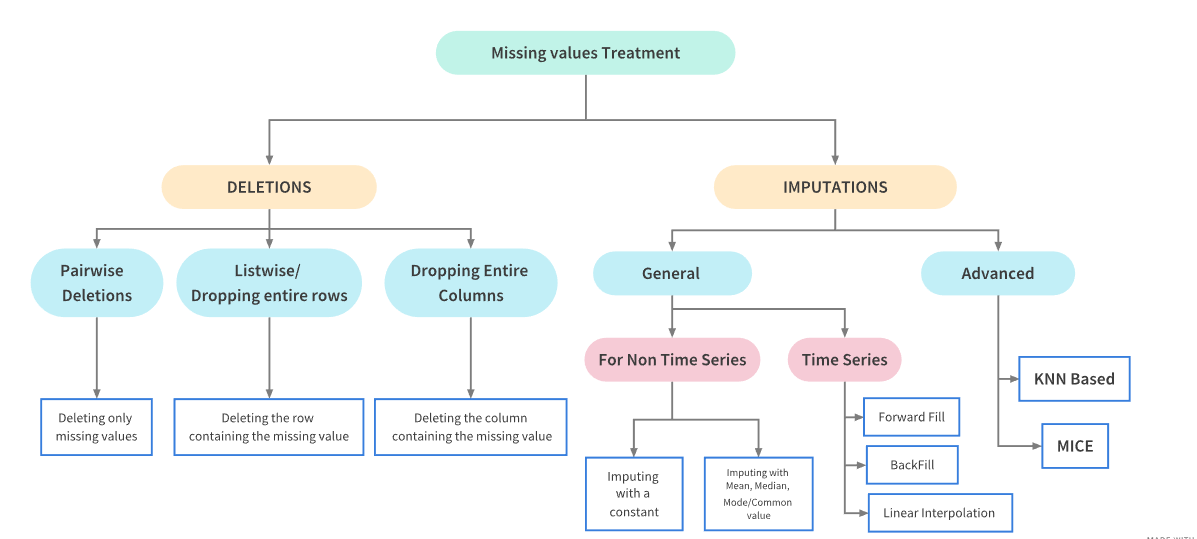

- Des données manquantes peuvent survenir dans l'ensemble de données pour plusieurs raisons : 
    - les données du champ spécifique n'ont pas été ajoutées par l'utilisateur/l'application de collecte de données, les données ont été perdues lors du transfert manuel, une erreur de programmation, etc.
    - Il est parfois essentiel d'en comprendre la cause. car cela influencera la façon dont vous traitez ces données.

- Pour les données numériques, pandas utilise une valeur à virgule flottante NaN (Not a Number) pour représenter les données manquantes. 
- Il s'agit d'une valeur unique définie dans la bibliothèque Numpy , nous devrons donc également l'importer.
- NaN est le marqueur de valeur manquante par défaut pour des raisons de rapidité de calcul et de commodité.

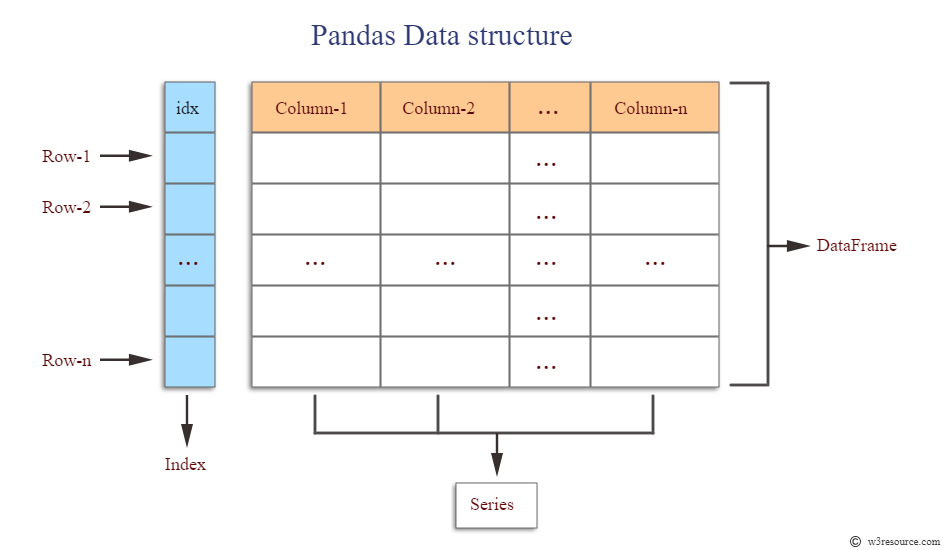

In [3]:
import numpy as np
import pandas as pd

# Creating a pandas series
data = pd.Series([0, 1, 2, 3, 4, 5, np.nan, 6, 7, 8])

# To check if and what index in the dataset contains null value
data.isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
dtype: bool

- Ci-dessus, nous avons utilisé la fonction isnull()qui retourne une valeur booléenne vraie ou fausse.
- Vrai, lorsque les données de cet index particulier sont réellement manquantes ou NaN. Le contraire est la notnull()fonction.

In [4]:
# To check where the dataset does not contain null value - opposite of isnull()
data.notnull()

0     True
1     True
2     True
3     True
4     True
5     True
6    False
7     True
8     True
9     True
dtype: bool

- De plus, nous pouvons utiliser la dropna()fonction pour filtrer les données manquantes et supprimer la valeur nulle (manquante) et ne voir que les valeurs non nulles.
- Cependant, la valeur NaN n'est pas vraiment supprimée et peut toujours être trouvée dans l'ensemble de données d'origine.

In [5]:
# Will not show the index 6 cause it contains null (NaN) value
data.dropna()

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
7    6.0
8    7.0
9    8.0
dtype: float64

In [6]:
data

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
6    NaN
7    6.0
8    7.0
9    8.0
dtype: float64

- Ce que vous pouvez faire pour vraiment "supprimer" ou supprimer la valeur NaN est soit de stocker le nouvel ensemble de données (sans NaN) afin que la série de données d'origine ne soit pas falsifiée, soit d'appliquer une suppression sur place .
- L' argument inplace a une valeur par défaut de false.

In [7]:
not_null_data = data.dropna()
not_null_data

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
7    6.0
8    7.0
9    8.0
dtype: float64

In [8]:
# Drop the 6th index in the original 'data' since it has a NaN place
data.dropna(inplace = True)
data

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
7    6.0
8    7.0
9    8.0
dtype: float64

In [9]:
# Creating a dataframe with 4 rows and 4 columns (4*4 matrix)
data_dim = pd.DataFrame([[1,2,3,np.nan],[4,5,np.nan,np.nan],[7,np.nan,np.nan,np.nan],[np.nan,np.nan,np.nan,np.nan]])
data_dim

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,4.0,5.0,NaN,NaN
2,7.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


- Supposons maintenant que vous ne souhaitiez supprimer que les lignes ou les colonnes qui sont toutes nulles ou uniquement celles qui contiennent un certain nombre de valeurs nulles.
- Découvrez les différents scénarios, rappelez-vous que la baisse ne se produit pas sur place , de sorte que l'ensemble de données réel n'est pas altéré.
- Faites attention aux arguments passés à la dropna()fonction pour déterminer comment supprimer les données manquantes.

In [10]:
# Drop all rows and columns containing NaN value
data_dim.dropna()

,0,1,2,3


In [11]:
# Drop all rows and columns containing entirely of NaN value
data_dim.dropna(how = 'all')

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,4.0,5.0,NaN,NaN
2,7.0,NaN,NaN,NaN


In [12]:
# Drop only columns that contain entirely NaN value
# Default is 0 - which signifies rows
data_dim.dropna(axis = 1, how = 'all')

,0,1,2
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,7.0,NaN,NaN
3,NaN,NaN,NaN


In [13]:
# Drop all columns that have more than 2 NaN values
data_dim.dropna(axis = 1, thresh = 2)

,0,1
0,1.0,2.0
1,4.0,5.0
2,7.0,NaN
3,NaN,NaN


In [14]:
# Drop all rows that have more than 2 NaN values
data_dim.dropna(thresh = 2)

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,4.0,5.0,NaN,NaN


- Vous savez maintenant comment identifier et supprimer les valeurs manquantes que ce soit pour simplement voir l'ensemble de données résultant ou pour effectuer une suppression sur place .
- Dans de nombreux cas, supprimer simplement les valeurs nulles n'est pas une option réalisable et vous souhaiterez peut-être remplir les données manquantes avec une autre valeur.
- Voyons comment vous pouvez faire cela...

# **Remplir les données manquantes**
- Pour remplacer ou plutôt "remplir" les données nulles, vous pouvez utiliser la fillna()fonction.
- Par exemple, essayons d'utiliser le même ensemble de données que ci-dessus et essayons de remplir les valeurs NaN avec 0.

In [15]:
# Check what the dataset looks like again
data_dim

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,4.0,5.0,NaN,NaN
2,7.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


In [16]:
# Fill the NaN values with 0
data_dim_fill = data_dim.fillna(0)
data_dim_fill

,0,1,2,3
0,1.0,2.0,3.0,0.0
1,4.0,5.0,0.0,0.0
2,7.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0


- Et comme avec dropna(), vous pouvez également faire beaucoup d'autres choses en fonction du type d'argument que vous passez. 
- Aussi un rappel que le passage de l' inplace = True argument apportera la modification à l'ensemble de données d'origine.

In [17]:
# Pass a dictionary to use differnt values for each column
data_dim_fill = data_dim.fillna({0: 0, 1: 8, 2: 9, 3: 10})
data_dim_fill

,0,1,2,3
0,1.0,2.0,3.0,10.0
1,4.0,5.0,9.0,10.0
2,7.0,8.0,9.0,10.0
3,0.0,8.0,9.0,10.0


- Vous pouvez passer un argument de méthode fillna() à la fonction qui propage automatiquement les valeurs non nulles vers l'avant (ffill ou pad) ou vers l'arrière (bfill ou backfill).

In [18]:
# Pass method to determine how to fill-up the column - forward here
data_dim_fill = data_dim.fillna(method='ffill')
data_dim_fill

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,4.0,5.0,3.0,NaN
2,7.0,5.0,3.0,NaN
3,7.0,5.0,3.0,NaN


- Vous pouvez également limiter le nombre de remplissages ci-dessus. Par exemple, ne remplissez que deux emplacements dans les colonnes...
- De plus, si vous passez axe = 1 , cela remplira la valeur de la ligne en conséquence.

In [19]:
# Pass method to determine how to fill-up the column - forward here
data_dim_fill = data_dim.fillna(method='ffill', limit = 2)
data_dim_fill

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,4.0,5.0,3.0,NaN
2,7.0,5.0,3.0,NaN
3,7.0,5.0,NaN,NaN


In [20]:
# Pass method to determine how to fill-up the row - forward here
data_dim_fill = data_dim.fillna(axis = 1, method='ffill')
data_dim_fill

,0,1,2,3
0,1.0,2.0,3.0,3.0
1,4.0,5.0,5.0,5.0
2,7.0,7.0,7.0,7.0
3,NaN,NaN,NaN,NaN


- Avec une certaine compréhension des données et de votre cas d'utilisation, vous pouvez utiliser la fillna()fonction de bien d'autres manières que de simplement la remplir avec des chiffres.
- Vous pouvez le remplir en utilisant la moyenne en utilisant également la mean()valeur médiane ou la valeur médiane median()...

In [21]:
# Check the data_dim dataset
data_dim

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,4.0,5.0,NaN,NaN
2,7.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


In [22]:
# Fill the NaN value with mean values in the corresponding column
data_dim_fill = data_dim.fillna(data_dim.mean())
data_dim_fill

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,4.0,5.0,3.0,NaN
2,7.0,3.5,3.0,NaN
3,4.0,3.5,3.0,NaN
